# Loading Required Librarys

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import bar_chart_race as bcr
from IPython.display import Image,display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

## Load The Data Set

In [4]:
# Load the dataset 
df = pd.read_csv(r"C:\Project\Engineering_colleges.csv")

In [5]:
df.head() # Check top 5 observations

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114.0,1,Chennai,Tamil Nadu,Public/Govt,₹8.58 Lakhs,11.0,30.0
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265.0,2,New Delhi,Delhi,Public/Govt,₹8.58 Lakhs,14.0,48.0
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161.0,3,Mumbai,Maharashtra,Public/Govt,₹8.69 Lakhs,11.0,42.0
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156.0,4,Kanpur,Uttar Pradesh,Public/Govt,₹11.67 Lakhs,9.0,40.0
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323.0,5,Kharagpur,West Bengal,Public/Govt,₹10.42 Lakhs,16.0,62.0


In [6]:
df.tail() # Check bottom 5 observations

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
545,"Canning Government Polytechnic, South 24 Parganas",NaN,NaN,Not Mentioned,South 24 Parganas,West Bengal,Public/Govt,NaN,NaN,NaN
546,"Central Calcutta Polytechnic, Kolkata",3.0,1.0,Not Mentioned,Kolkata,West Bengal,Public/Govt,NaN,NaN,NaN
547,"Springfields Engineering College, Hyderabad",NaN,NaN,Not Mentioned,Hyderabad,Telangana,Private,NaN,NaN,NaN
548,"Itahar Government Polytechnic, Uttar Dinajpur",NaN,NaN,Not Mentioned,North Dinajpur,West Bengal,Public/Govt,NaN,NaN,NaN
549,"GRD Polytechnic, Dehradun",NaN,NaN,Not Mentioned,Dehradun,Uttarakhand,Private,₹1.85 Lakhs,NaN,NaN


In [7]:
df['BTech_Courses'].unique()

array([11., 14.,  9., 16., 13., 12., 15., 18., 54.,  8., 10.,  7.,  5.,
       21., 31., 35., 28.,  6.,  2.,  3., 26., 41., 19., nan, 29., 24.,
       17., 40., 39., 25., 48., 53., 37.,  4., 30., 22., 23., 20., 34.])

In [8]:
df.shape # check the shape of the datatset

(550, 10)

In [9]:
df.columns # print the column names 

Index(['Colleges', 'Rating', 'Reviews', 'NIRF_Ranking', 'City', 'State',
       'Ownership', 'Fees', 'BTech_Courses', 'MTech_Courses'],
      dtype='object')

In [10]:
df.info() # Check the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Colleges       550 non-null    object 
 1   Rating         375 non-null    float64
 2   Reviews        375 non-null    float64
 3   NIRF_Ranking   532 non-null    object 
 4   City           550 non-null    object 
 5   State          550 non-null    object 
 6   Ownership      550 non-null    object 
 7   Fees           310 non-null    object 
 8   BTech_Courses  335 non-null    float64
 9   MTech_Courses  231 non-null    float64
dtypes: float64(4), object(6)
memory usage: 43.1+ KB


In [11]:
df.dtypes # check the dtypes of columns
df.dtypes.value_counts() # check the count of dtypes in the dataset

Colleges          object
Rating           float64
Reviews          float64
NIRF_Ranking      object
City              object
State             object
Ownership         object
Fees              object
BTech_Courses    float64
MTech_Courses    float64
dtype: object

object     6
float64    4
Name: count, dtype: int64

## Changing the dtypes in DataFrame

In [13]:
df["BTech_Courses"].mean()

11.498507462686566

In [14]:
# We can substitute NaN values/missing values in BTech courses column with average courses offered by an engineering college

df["BTech_Courses"].replace(np.nan, 11 , inplace=True)

In [15]:
df["BTech_Courses"] = df["BTech_Courses"].astype("int64")

In [16]:
df["MTech_Courses"] = df["MTech_Courses"].fillna(0).astype("int64") # replace MTech courses without values with zero

In [17]:
df["Reviews"] = df["Reviews"].fillna(0).astype("int64")

In [18]:
df.dtypes # check the dtypes of columns
df.dtypes.value_counts() # check the count of dtypes in the dataset

Colleges          object
Rating           float64
Reviews            int64
NIRF_Ranking      object
City              object
State             object
Ownership         object
Fees              object
BTech_Courses      int64
MTech_Courses      int64
dtype: object

object     6
int64      3
float64    1
Name: count, dtype: int64

In [19]:
df

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114,1,Chennai,Tamil Nadu,Public/Govt,₹8.58 Lakhs,11,30
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265,2,New Delhi,Delhi,Public/Govt,₹8.58 Lakhs,14,48
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161,3,Mumbai,Maharashtra,Public/Govt,₹8.69 Lakhs,11,42
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156,4,Kanpur,Uttar Pradesh,Public/Govt,₹11.67 Lakhs,9,40
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323,5,Kharagpur,West Bengal,Public/Govt,₹10.42 Lakhs,16,62
...,...,...,...,...,...,...,...,...,...,...
545,"Canning Government Polytechnic, South 24 Parganas",NaN,0,Not Mentioned,South 24 Parganas,West Bengal,Public/Govt,NaN,11,0
546,"Central Calcutta Polytechnic, Kolkata",3.0,1,Not Mentioned,Kolkata,West Bengal,Public/Govt,NaN,11,0
547,"Springfields Engineering College, Hyderabad",NaN,0,Not Mentioned,Hyderabad,Telangana,Private,NaN,11,0
548,"Itahar Government Polytechnic, Uttar Dinajpur",NaN,0,Not Mentioned,North Dinajpur,West Bengal,Public/Govt,NaN,11,0


In [20]:
df["Fees"].unique()

array(['₹8.58 Lakhs', '₹8.69 Lakhs', '₹11.67 Lakhs', '₹10.42 Lakhs',
       '₹8.90 Lakhs', '₹11.99 Lakhs', '₹9.08 Lakhs', '₹6.30 Lakhs', nan,
       '₹11 Lakhs', '₹2.20 Lakhs', '₹10.95 Lakhs', '₹5.72 Lakhs',
       '₹8.67 Lakhs', '₹6.28 Lakhs', '₹22.32 Lakhs', '₹5.74 Lakhs',
       '₹9.36 Lakhs', '₹24 Lakhs', '₹64.60 K', '₹6.23 Lakhs',
       '₹11.05 Lakhs', '₹10.25 Lakhs', '₹20.15 Lakhs', '₹8.64 Lakhs',
       '₹8.63 Lakhs', '₹10.75 Lakhs', '₹9.85 Lakhs', '₹9.95 Lakhs',
       '₹5.31 Lakhs', '₹14.91 Lakhs', '₹5.50 Lakhs', '₹6.00 Lakhs',
       '₹7.20 Lakhs', '₹6.17 Lakhs', '₹6.25 Lakhs', '₹6.58 Lakhs',
       '₹16 Lakhs', '₹15.74 Lakhs', '₹5.44 Lakhs', '₹16.36 Lakhs',
       '₹5.48 Lakhs', '₹16.74 Lakhs', '₹8.94 Lakhs', '₹6.02 Lakhs',
       '₹19.48 Lakhs', '₹9.38 Lakhs', '₹6.36 Lakhs', '₹5.83 Lakhs',
       '₹6.52 Lakhs', '₹8.19 Lakhs', '₹1.44 Lakhs', '₹15.02 Lakhs',
       '₹8.93 Lakhs', '₹5.78 Lakhs', '₹10 Lakhs', '₹2.64 Lakhs',
       '₹5.49 Lakhs', '₹5.73 Lakhs', '₹8.92 Lakhs', '

In [21]:
def convert_fees(Fees):
    fee_str = str(Fees)  # Ensure we are working with a string
    if 'K' in fee_str:
        # Remove currency symbol and convert to float
        value = float(fee_str.replace('₹', '').replace(' K', '').strip())
        return f"{value / 100:.2f} Lakhs"  # Convert K to Lakhs
    return fee_str  # Return as is if it's already in Lakhs

In [22]:
df['Fees'] = df['Fees'].apply(convert_fees)

In [23]:
df.head(50)

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114,1,Chennai,Tamil Nadu,Public/Govt,₹8.58 Lakhs,11,30
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265,2,New Delhi,Delhi,Public/Govt,₹8.58 Lakhs,14,48
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161,3,Mumbai,Maharashtra,Public/Govt,₹8.69 Lakhs,11,42
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156,4,Kanpur,Uttar Pradesh,Public/Govt,₹11.67 Lakhs,9,40
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323,5,Kharagpur,West Bengal,Public/Govt,₹10.42 Lakhs,16,62
5,IIT Roorkee - Indian Institute of Technology R...,4.4,407,6,Roorkee,Uttarakhand,Public/Govt,₹8.90 Lakhs,13,54
6,IIT Guwahati (IITG) - Indian Institute of Tech...,4.3,186,7,Guwahati,Assam,Public/Govt,₹11.99 Lakhs,12,28
7,IIT Hyderabad - Indian Institute of Technology...,4.6,27,8,Hyderabad,Telangana,Public/Govt,₹9.08 Lakhs,15,38
8,NIT Trichy - National Institute of Technology ...,4.4,304,9,Tiruchirappalli,Tamil Nadu,Public/Govt,₹6.30 Lakhs,9,23
9,IIT BHU - Indian Institute of Technology Banar...,4.6,160,10,Varanasi,Uttar Pradesh,Public/Govt,₹8.58 Lakhs,9,34


# Check for Missing values

In [25]:
df.dtypes.isna().sum()  # check for missing values
df.isnull().sum() # check for missing values

0

Colleges           0
Rating           175
Reviews            0
NIRF_Ranking      18
City               0
State              0
Ownership          0
Fees               0
BTech_Courses      0
MTech_Courses      0
dtype: int64

In [26]:
df.isna().sum().sort_values(ascending = False)
# Sort the missing value output based on count 

Rating           175
NIRF_Ranking      18
Colleges           0
Reviews            0
City               0
State              0
Ownership          0
Fees               0
BTech_Courses      0
MTech_Courses      0
dtype: int64

In [27]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
545     True
546     True
547    False
548     True
549     True
Length: 550, dtype: bool

In [28]:
# Check the missing value percentage in each column 

((((df.isna().sum().sort_values(ascending = False))/len(df))*100).astype(str) + "%")

Rating           31.818181818181817%
NIRF_Ranking      3.272727272727273%
Colleges                        0.0%
Reviews                         0.0%
City                            0.0%
State                           0.0%
Ownership                       0.0%
Fees                            0.0%
BTech_Courses                   0.0%
MTech_Courses                   0.0%
dtype: object

In [29]:
# Print the columns with atleast one missing values
df.isna().any() 
df["NIRF_Ranking"].isna().any()

print([col for col in df.columns if df[col].isna().any()])

len([col for col in df.columns if df[col].isna().any()])

Colleges         False
Rating            True
Reviews          False
NIRF_Ranking      True
City             False
State            False
Ownership        False
Fees             False
BTech_Courses    False
MTech_Courses    False
dtype: bool

True

['Rating', 'NIRF_Ranking']


2

In [30]:
# Print the columns with all missing values
df.isna().all() 
df["State"].isna().all()

print([col for col in df.columns if df[col].isna().all()])

len([col for col in df.columns if df[col].isna().all()])

Colleges         False
Rating           False
Reviews          False
NIRF_Ranking     False
City             False
State            False
Ownership        False
Fees             False
BTech_Courses    False
MTech_Courses    False
dtype: bool

False

[]


0

In [31]:
df["NIRF_Ranking"].unique()

array([' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' 10', ' 11',
       ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19', ' 20',
       ' 21', ' 22', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28', ' 29',
       ' 30', ' 31', ' 32', ' 33', ' 34', ' 35', ' 36', ' 37', ' 38',
       ' 39', ' 40', ' 41', ' 43', ' 44', ' 45', ' 46', ' 47', ' 48',
       ' 49', ' 50', ' 51', ' 52', ' 54', ' 55', ' 56', ' 57', ' 58',
       ' 59', ' 60', ' 61', ' 62', ' 63', ' 64', ' 66', ' 67', ' 68',
       ' 69', ' 70', ' 71', ' 72', ' 73', ' 74', ' 75', ' 76', ' 77',
       ' 78', ' 79', ' 80', ' 81', ' 82', ' 83', ' 84', ' 85', ' 86',
       ' 87', ' 89', ' 90', ' 91', ' 92', ' 93', ' 94', ' 95', ' 96',
       ' 97', ' 98', ' 99', ' 100', ' 101-150', ' 151-200', ' 201-300',
       nan, 'Not Mentioned'], dtype=object)

In [32]:
# Replace nan values with "Not Mentioned" for NIRF_Ranking column
df["NIRF_Ranking"].replace(np.nan, "Not Mentioned" , inplace=True)

In [33]:
# Again checking nan values
df.isna().any() 
df["NIRF_Ranking"].isna().any()

Colleges         False
Rating            True
Reviews          False
NIRF_Ranking     False
City             False
State            False
Ownership        False
Fees             False
BTech_Courses    False
MTech_Courses    False
dtype: bool

False

## Check for Duplicates in the DataFrame

In [35]:
df[df.duplicated()]

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
100,JNTUK Kakinada - Jawaharlal Nehru Technologica...,4.4,17,101-150,Kakinada,Andhra Pradesh,Public/Govt,₹2.79 Lakhs,9,113
300,"SRM Institute of Science and Technology, Vadap...",4.4,18,Not Mentioned,Vadapalani,Tamil Nadu,Private,₹12 Lakhs,9,0
301,"SV Institute of Engineering and Technology, Mo...",NaN,0,Not Mentioned,Hyderabad,Telangana,Private,₹1.40 Lakhs,5,3
302,"NCR Technical Campus, Aligarh",NaN,0,Not Mentioned,Aligarh,Uttar Pradesh,Private,nan,7,0
303,"Kalinga University, Raipur",4.0,17,Not Mentioned,Naya Raipur,Chhattisgarh,Private,₹6.18 Lakhs,4,0
304,"Rai University, Ahmedabad",4.0,18,Not Mentioned,Saroda,Gujarat,Private,₹1.33 Lakhs,3,0
305,"Sri Guru Granth Sahib World University, Fatehg...",NaN,0,Not Mentioned,Fatehgarh Sahib,Punjab,Private,₹3.96 Lakhs,6,0
306,BITS Hyderabad - BITS Pilani- Hyderabad Campus...,4.4,59,Not Mentioned,Hyderabad,Telangana,Private,₹22.32 Lakhs,8,13
307,"Navrachana University, Vadodara",3.9,16,Not Mentioned,Vadodara,Gujarat,Private,₹4.36 Lakhs,5,4
308,"NIILM University, Kaithal",1.4,1,Not Mentioned,Ujana,Haryana,Private,nan,2,0


In [36]:
df["Colleges"].nunique()

531

In [37]:
df = df.drop_duplicates()

In [38]:
df.shape

(531, 10)

## Fixing the NaN values of Fees with Average fees for engineering colleges

In [40]:
# Convert Fees column to float dtype

def convert_fees_to_float(fee):
    # Remove the currency symbol and "Lakhs", then convert to float
    return float(fee.replace('₹', '').replace(' Lakhs', '').strip())

# Apply the conversion
df['Fees'] = df['Fees'].apply(convert_fees_to_float)

In [41]:
df['Fees'].dtype

dtype('float64')

In [42]:
round(df['Fees'].mean(),2)

5.94

In [43]:
# Replace all NaN values with 5.94 lakh fees

df['Fees'].fillna(df['Fees'].mean(), inplace=True)

In [44]:
df.head(15)

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114,1,Chennai,Tamil Nadu,Public/Govt,8.58000,11,30
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265,2,New Delhi,Delhi,Public/Govt,8.58000,14,48
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161,3,Mumbai,Maharashtra,Public/Govt,8.69000,11,42
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156,4,Kanpur,Uttar Pradesh,Public/Govt,11.67000,9,40
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323,5,Kharagpur,West Bengal,Public/Govt,10.42000,16,62
5,IIT Roorkee - Indian Institute of Technology R...,4.4,407,6,Roorkee,Uttarakhand,Public/Govt,8.90000,13,54
6,IIT Guwahati (IITG) - Indian Institute of Tech...,4.3,186,7,Guwahati,Assam,Public/Govt,11.99000,12,28
7,IIT Hyderabad - Indian Institute of Technology...,4.6,27,8,Hyderabad,Telangana,Public/Govt,9.08000,15,38
8,NIT Trichy - National Institute of Technology ...,4.4,304,9,Tiruchirappalli,Tamil Nadu,Public/Govt,6.30000,9,23
9,IIT BHU - Indian Institute of Technology Banar...,4.6,160,10,Varanasi,Uttar Pradesh,Public/Govt,8.58000,9,34


In [45]:
df["Fees"] = df["Fees"].round(2)

In [46]:
df.head()

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114,1,Chennai,Tamil Nadu,Public/Govt,8.58,11,30
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265,2,New Delhi,Delhi,Public/Govt,8.58,14,48
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161,3,Mumbai,Maharashtra,Public/Govt,8.69,11,42
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156,4,Kanpur,Uttar Pradesh,Public/Govt,11.67,9,40
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323,5,Kharagpur,West Bengal,Public/Govt,10.42,16,62


## Changing The Column Name 

In [48]:
df.columns

Index(['Colleges', 'Rating', 'Reviews', 'NIRF_Ranking', 'City', 'State',
       'Ownership', 'Fees', 'BTech_Courses', 'MTech_Courses'],
      dtype='object')

In [49]:
df.rename(columns={'Fees': 'Fees_in_lakhs'}, inplace=True)

In [50]:
df.head()

,Colleges,Rating,Reviews,NIRF_Ranking,City,State,Ownership,Fees_in_lakhs,BTech_Courses,MTech_Courses
0,IIT Madras - Indian Institute of Technology Ma...,4.7,114,1,Chennai,Tamil Nadu,Public/Govt,8.58,11,30
1,IIT Delhi - Indian Institute of Technology Delhi,4.6,265,2,New Delhi,Delhi,Public/Govt,8.58,14,48
2,IIT Bombay - Indian Institute of Technology Bo...,4.6,161,3,Mumbai,Maharashtra,Public/Govt,8.69,11,42
3,IIT Kanpur - Indian Institute of Technology Ka...,4.4,156,4,Kanpur,Uttar Pradesh,Public/Govt,11.67,9,40
4,IIT Kharagpur - Indian Institute of Technology...,4.7,323,5,Kharagpur,West Bengal,Public/Govt,10.42,16,62


## Numerical columns and Categorical columns

In [97]:
# Extract numeric columns from DF
df.select_dtypes("number").head() 

num_cols = df.select_dtypes("number").columns 
print(len(num_cols), num_cols, sep = "\n") 

,Rating,Reviews,Fees_in_lakhs,BTech_Courses,MTech_Courses
0,4.7,114,8.58,11,30
1,4.6,265,8.58,14,48
2,4.6,161,8.69,11,42
3,4.4,156,11.67,9,40
4,4.7,323,10.42,16,62


5
Index(['Rating', 'Reviews', 'Fees_in_lakhs', 'BTech_Courses', 'MTech_Courses'], dtype='object')


In [101]:
# Extract categorical columns from DF
df.select_dtypes(exclude="number").head() 

cat_cols = df.select_dtypes(exclude="number").columns 
print(len(cat_cols), cat_cols, sep = "\n") 

,Colleges,NIRF_Ranking,City,State,Ownership
0,IIT Madras - Indian Institute of Technology Ma...,1,Chennai,Tamil Nadu,Public/Govt
1,IIT Delhi - Indian Institute of Technology Delhi,2,New Delhi,Delhi,Public/Govt
2,IIT Bombay - Indian Institute of Technology Bo...,3,Mumbai,Maharashtra,Public/Govt
3,IIT Kanpur - Indian Institute of Technology Ka...,4,Kanpur,Uttar Pradesh,Public/Govt
4,IIT Kharagpur - Indian Institute of Technology...,5,Kharagpur,West Bengal,Public/Govt


5
Index(['Colleges', 'NIRF_Ranking', 'City', 'State', 'Ownership'], dtype='object')


# Data visualization

## Univariate analysis

### Box plots of numerical columns

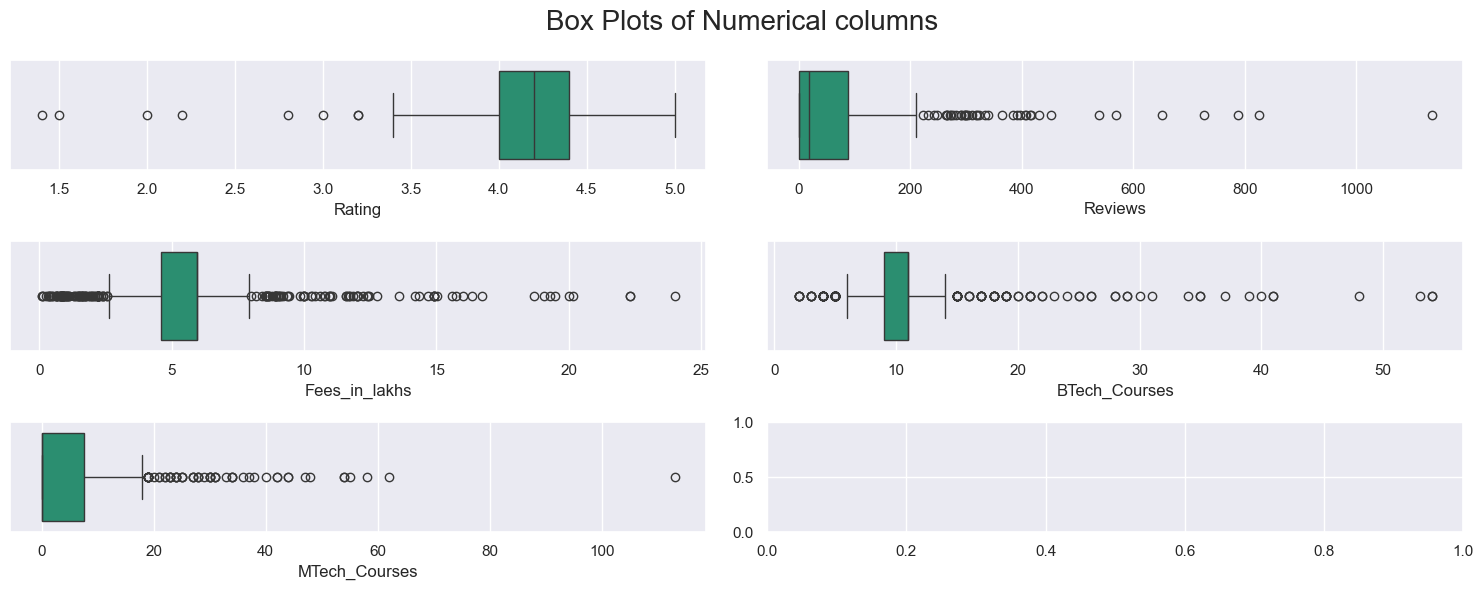

In [373]:
df.select_dtypes("number").head() 

num_cols = df.select_dtypes("number").columns  

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,6))

# print(ax.flatten())
pos_array = ax.flatten()

for i in range(len(num_cols)):
    sns.boxplot(data = df,x=num_cols[i], 
            ax = pos_array[i], palette=sns.color_palette("Dark2"))

plt.suptitle("Box Plots of Numerical columns", fontsize = 20)
plt.tight_layout()

plt.savefig('Box_Plots_of_Numerical_columns.png', bbox_inches='tight')

plt.show();

#### Observation:

- Majority of the Engineering Colleges which are rated ranges from 3.4 to 5 stars.
- Reviews given on the website careers360 by people are less than 100 for any college.
- Most of the Engineering colleges have fees around 5lakhs.
- Each college offers on an average 10 Btech courses.
- Some colleges offer in a range 0-12 MTech courses.  

### Count plots of Categorical columns

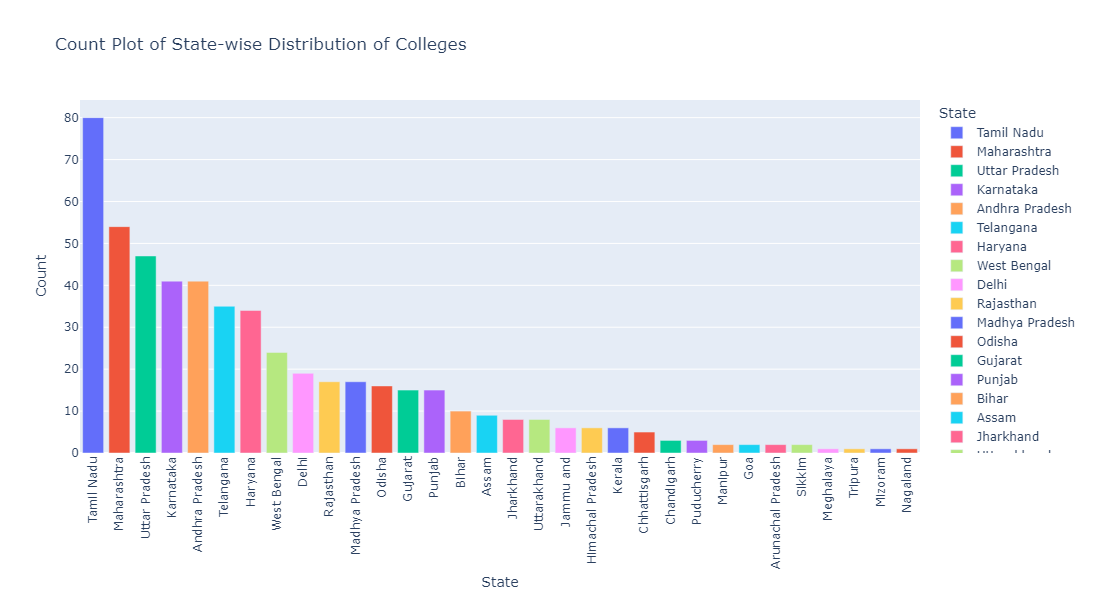

In [207]:
# Count occurrences of each state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create a bar chart
fig = px.bar(
    state_counts,
    x='State',
    y='Count',
    title='Count Plot of State-wise Distribution of Colleges',
    color='State',  # Color by State
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use an alternative qualitative palette
)

# Update layout for better readability and set figure size
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count',
    xaxis_tickangle=-90,  # Rotate x-axis labels
    height=600,  # Set height of the plot
    width=1000,  # Set width of the plot
)

fig.write_html("State_counts.html")


#### Observation:

- The count plot  shows distribution of Engineering colleges based on states.
- Tamilnadu has the maximum number `(80)` of Engineering colleges followed by maharashtra `(54)`.
- Small states like `Nagaland, Meghalaya,Tripura and Mizoram` has the least number `(1)` of Engineering colleges.

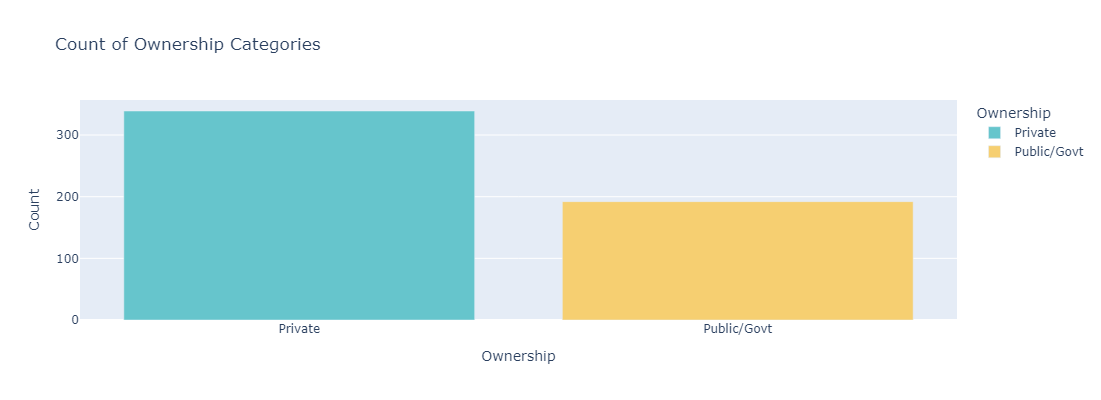

In [200]:
# Count occurrences of each category
ownership_counts = df['Ownership'].value_counts().reset_index()
ownership_counts.columns = ['Ownership', 'Count'] 

# Create a bar chart
fig = px.bar(ownership_counts, x='Ownership', y='Count',
             title='Count of Ownership Categories',
             color='Ownership', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout for better readability and set figure size
fig.update_layout(
    xaxis_title='Ownership',
    yaxis_title='Count',
    height=400,  # Set height of the plot
    width=800,  # Set width of the plot
)


fig.write_html("ownership_counts.html")

#### Observation :

- From the count plot we can see the most of the engineering colleges are privately owned (`339`).

In [203]:
import os
print(os.getcwd())

C:\Users\aksha\Data_Analytics\1_Python_programing


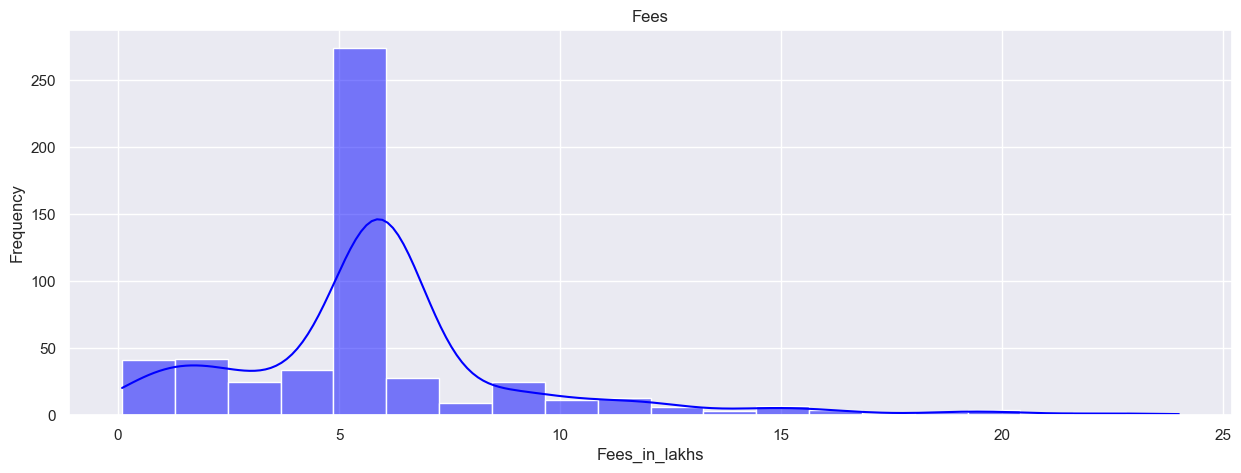

In [365]:
plt.figure(figsize=(15, 5))

sns.histplot(df['Fees_in_lakhs'], bins=20, kde=True, color='blue')

# Adding labels and title
plt.title('Fees')
plt.xlabel('Fees_in_lakhs')
plt.ylabel('Frequency')

plt.savefig('Fees.png', bbox_inches='tight')

# Display the plot
plt.show();

## Bivariate analysis

### Scatter plots (Numerical vs Numerical)

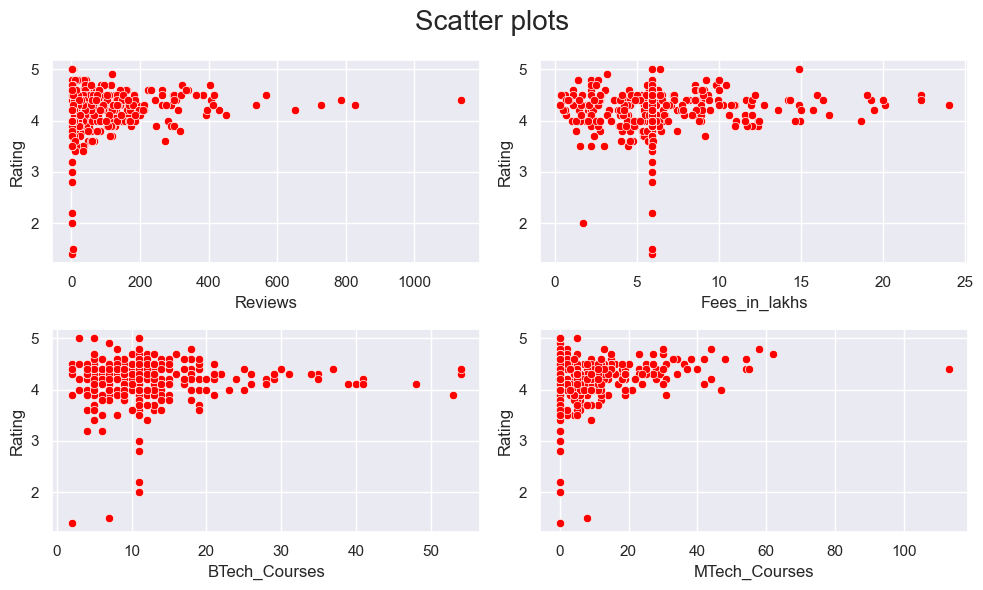

In [363]:
num_cols = ['Reviews','Fees_in_lakhs', 'BTech_Courses', 'MTech_Courses']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,6))

# print(ax.flatten())
pos_array = ax.flatten()

for i in range(len(num_cols)):
    sns.scatterplot(data = df,x=num_cols[i],y='Rating',
    ax = pos_array[i], color='red')

plt.suptitle("Scatter plots", fontsize = 20)
plt.tight_layout()

plt.savefig('Scatter_plots.png', bbox_inches='tight')

plt.show();

#### Observations:
- Around 200 people who have given rating between `3.5-5` stars.
- Mostly people are preferring engineering collegs are charging below `10 Lakhs` college Fees and thus highly rated.
- Most of the Engineering colleges preferred by people (according to the number of ratings) have less than 20 B.Tech and M.Tech courses.

### Box plot of Ownership vs. Rating (Numerical vs Categorical)

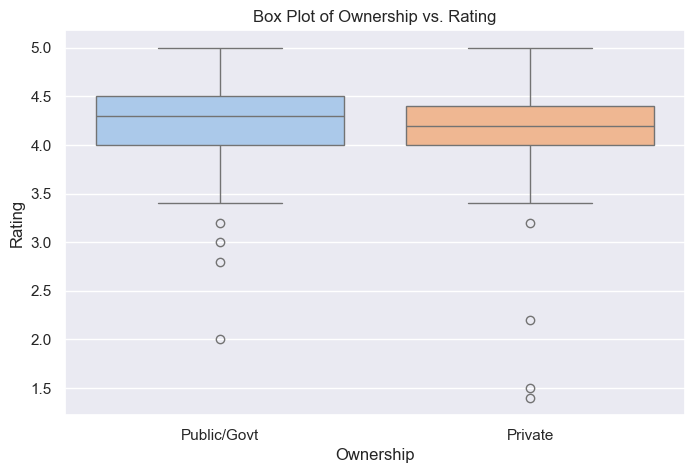

In [361]:
# Create a box plot
plt.figure(figsize=(8, 5))

sns.boxplot(x='Ownership', y='Rating', data=df, palette='pastel')

plt.title('Box Plot of Ownership vs. Rating')
plt.xlabel('Ownership')
plt.ylabel('Rating')

plt.savefig('Box_Plot_of_Ownership_vs_Ratingp.png', bbox_inches='tight')

plt.show();

#### Observation:
- `Public/Govt` are rated Higher than the Private Engineering colleges.

### Box Plot of Fees vs. Ownership (Numerical vs Categorical)

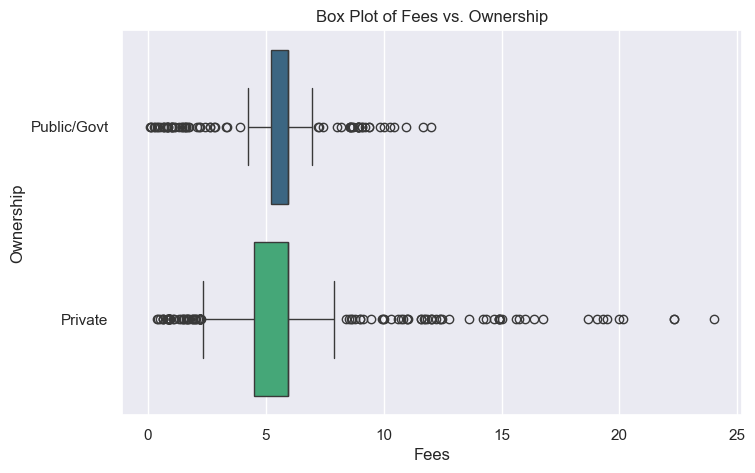

In [359]:
# Create a box plot
plt.figure(figsize=(8, 5))

sns.boxplot(x='Fees_in_lakhs', y='Ownership', data=df, palette='viridis')

plt.title('Box Plot of Fees vs. Ownership')
plt.xlabel('Fees')
plt.ylabel('Ownership')

plt.savefig('Box_Plot_of_Fees_vs_Ownership.png', bbox_inches='tight')

plt.show();

#### Observation:
- Looking at the more outliers in the Privately owned Engineering colleges we can say that they are charging more fees compared to Government colleges.

# Average fees state wise

In [307]:
# Group by State and calcuate the average Fees
average_fees_by_state = df.groupby('State')['Fees_in_lakhs'].mean().reset_index()

average_fees_by_state = (average_fees_by_state).round(2)

# Rename the column for clarity
average_fees_by_state.columns = ['State', 'Average Fees']

# Sort the average fees in descending order
df_sorted = average_fees_by_state.sort_values(by='Average Fees', ascending=False).reset_index(drop=True)

average_fees_by_state

,State,Average Fees
0,Andhra Pradesh,5.49
1,Arunachal Pradesh,3.02
2,Assam,6.70
3,Bihar,5.77
4,Chandigarh,7.54
5,Chhattisgarh,6.49
6,Delhi,6.34
7,Goa,5.62
8,Gujarat,4.86
9,Haryana,4.71


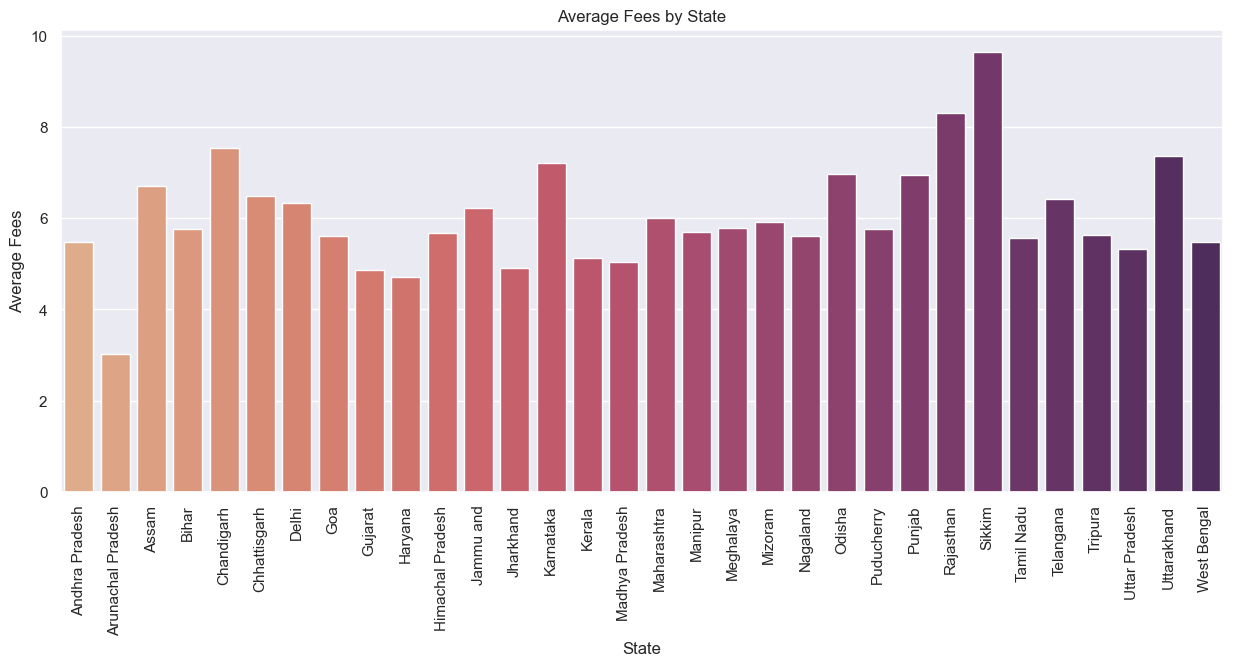

In [357]:
# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Average Fees', data=average_fees_by_state, palette='flare')
plt.title('Average Fees by State')
plt.xlabel('State')
plt.ylabel('Average Fees')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.savefig('Average_Fees_by_State.png', bbox_inches='tight')  # Save as PNG file

plt.show();

#### Observation:
- `Sikkim` has the highest college fees followed by the `Rajasthan`.
- Least college fees has the `Arunachal Pradesh`.

### Cross-tabulation of City and Ownership (Categorical vs Categorical)

In [331]:
# Cross-tabulation
cross_tab = pd.crosstab(df['City'], df['Ownership'])
cross_tab.head(15)

Ownership,Private,Public/Govt
City,,
Agartala,0,1
Agra,0,2
Ahmedabad,2,2
Ahmednagar,0,1
Aizawl,0,1
Aligarh,1,1
Alipurduar,0,1
Allahabad,0,3
Ambedkar Nagar,1,0


### Heatmap of State vs Ownership (Categorical vs Categorical)

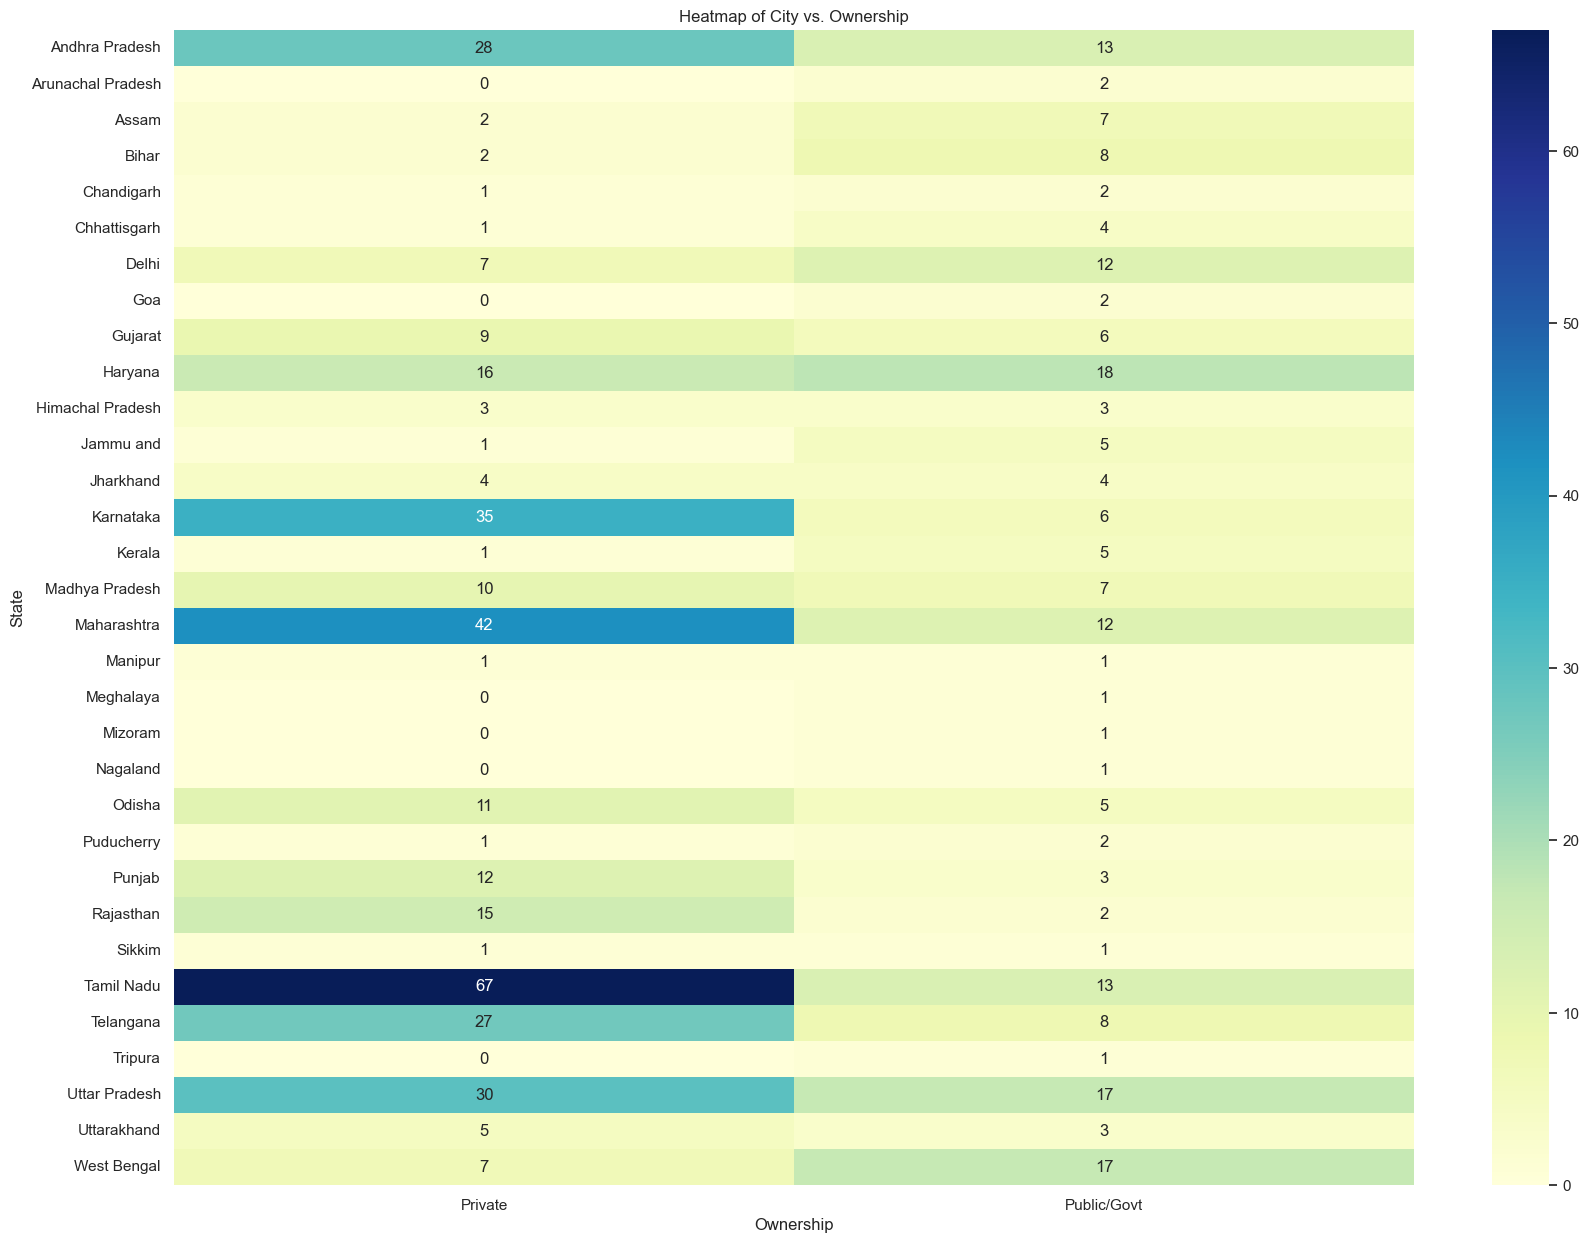

In [355]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['State'], df['Ownership'])

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of City vs. Ownership')
plt.xlabel('Ownership')
plt.ylabel('State')

plt.savefig('heatmap_state_vs_ownership.png', bbox_inches='tight')  # Save as PNG file

plt.show();

#### Observations:
- Highest Private Enigineering colleges are there in the `Tamilnadu` followed by `Maharasthra` and  `Karnataka`.
- Highest Governament Enigineering colleges are there in the `Haryana` followed by `Uttar Pradesh` and `West Bengal`.
- There are very less Enigineering colleges in few states Like `Nagaland`,`Mizoram`,`Maghalaya`,`Goa` and `Arunachal Pradesh`.

# Conclusion:


# -- END --